In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
def EncoderLayer():
    kernel = 3
    filter_size = 8
    pad = 1
    pool_size = 2
    return [
        keras.layers.Conv2D(filter_size, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation = 'relu'),
        keras.layers.Conv2D(filter_size, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size)),

        keras.layers.Conv2D(filter_size*2, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation ='relu'),
        keras.layers.Conv2D(filter_size*2, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation ='relu'),
        keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size)),

        keras.layers.Conv2D(filter_size*4, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation = 'relu'),
        keras.layers.Conv2D(filter_size*4, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation = 'relu'),
        keras.layers.Conv2D(filter_size*4, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size)),

        keras.layers.Conv2D(filter_size*8, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation = 'relu'),
        keras.layers.Conv2D(filter_size*8, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation = 'relu'),
        keras.layers.Conv2D(filter_size*8, kernel_size = (kernel, kernel), padding = 'same'),
        keras.layers.BatchNormalization(),
        keras.layers.Activation(activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size=(pool_size, pool_size)),]

In [3]:
def DecoderLayer():
    kernel = 3
    filter_size = 8
    pad = 1
    pool_size = 2
    return [keras.layers.UpSampling2D(size = (pool_size,pool_size)),
            keras.layers.Conv2D(filter_size*8, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filter_size*8, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filter_size*8, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),
            
            keras.layers.UpSampling2D(size = (pool_size,pool_size)),
            keras.layers.Conv2D(filter_size*4, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filter_size*4, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filter_size*4, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),

            keras.layers.UpSampling2D(size = (pool_size,pool_size)),
            keras.layers.Conv2D(filter_size*2, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filter_size*2, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),
            
            keras.layers.UpSampling2D(size = (pool_size,pool_size)),
            keras.layers.Conv2D(filter_size, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),
            keras.layers.Conv2D(filter_size, kernel_size = (kernel, kernel), padding = 'same'),
            keras.layers.BatchNormalization(),]

In [4]:
## Model with original data
model = tf.keras.Sequential()
model.add(tf.keras.layers.Layer(input_shape=(256, 256,3)))
model.encoding_layers = EncoderLayer()
model.decoding_layers = DecoderLayer()
for layer in model.encoding_layers:
    model.add(layer)
for layer in model.decoding_layers:
    model.add(layer)
model.add(keras.layers.Conv2D(3,(1,1), padding = 'same'))
model.add(keras.layers.Activation(activation = 'sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer (Layer)                (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 8)       32        
_________________________________________________________________
activation (Activation)      (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 8)       584       
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 8)       32        
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 8)       0

In [6]:
def dataset_setup(data_dir='', n_ims=2975, offset_bias=0, img_dim=256):
    """
    Method to import the training data from CityScape and divide into image-label pairs

    Inputs
    --
    data_dir: string
        Location for the data that is being imported
    n_ims: int
        Number of images contained in the folder chosen
    offset_bias: int
        Optionally, skip some images by starting at a position further than 0
    img_dim: int
        Expected image dimension (assuming square images)

    Outputs
    --
    X: list
        Images
    y: list
        Image labels per pixel
    """

    flist = os.listdir(data_dir)
    img0 = cv2.imread(data_dir+flist[0])

    y_dim,x_dim,_ = np.shape(img0)
    X = np.zeros((n_ims,y_dim,int(x_dim/2),3))
    y = np.zeros((n_ims,y_dim,int(x_dim/2),3))
    
    k = 0
    for f in flist[offset_bias:offset_bias+n_ims]:
        X[k] = cv2.imread(data_dir+f)[:,:img_dim]/img_dim
        y[k] = cv2.imread(data_dir+f)[:,img_dim:]/img_dim
        
        k = k+1

    return X, y

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip -uq "/content/drive/My Drive/cityscapes_data.zip" -d "/content/drive/My Drive/data"

In [9]:
import os
os.getcwd()
%cd /content/drive/My\ Drive/
os.getcwd()


/content/drive/My Drive


'/content/drive/My Drive'

In [10]:
# Directories containing the train and val data
train_files = "./data/cityscapes_data/train/"
test_files = "./data/cityscapes_data/val/"

# Setup image-label pairs
x, y = dataset_setup(data_dir=train_files, n_ims=2975, offset_bias=0, img_dim=256)
x_test, y_test = dataset_setup(data_dir=test_files, n_ims=500, offset_bias=0, img_dim=256)

In [11]:
x_train = x[:2600]
x_val = x[2600:]
y_train = y[:2600]
y_val = y[2600:]
print(np.shape(x_train))

(2600, 256, 256, 3)


In [12]:
# Compile model with specified optimizer and loss
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss='mse', metrics = metrics)

In [13]:
datagen1 = tf.keras.preprocessing.image.ImageDataGenerator()

datagen1.fit(x_train)


# Track model history as it trains
h_11 = model.fit(datagen1.flow(x_train, y_train, batch_size=32), \
         steps_per_epoch=len(x_train) // 32, epochs=10, \
              validation_data=datagen1.flow(x_val, y_val, batch_size=32), verbose=1)

# Save the weights
model.save_weights('./checkpoints/SegNet')

Epoch 1/10
81/81 [==============================] - 29s 137ms/step - loss: 0.0377 - accuracy: 0.4065 - val_loss: 0.3902 - val_accuracy: 0.3276
Epoch 2/10
81/81 [==============================] - 10s 124ms/step - loss: 0.0262 - accuracy: 0.5476 - val_loss: 0.3131 - val_accuracy: 0.2461
Epoch 3/10
81/81 [==============================] - 10s 123ms/step - loss: 0.0229 - accuracy: 0.5854 - val_loss: 0.1273 - val_accuracy: 0.3186
Epoch 4/10
81/81 [==============================] - 10s 124ms/step - loss: 0.0213 - accuracy: 0.5883 - val_loss: 0.0394 - val_accuracy: 0.5384
Epoch 5/10
81/81 [==============================] - 10s 123ms/step - loss: 0.0194 - accuracy: 0.5965 - val_loss: 0.0455 - val_accuracy: 0.5591
Epoch 6/10
81/81 [==============================] - 10s 124ms/step - loss: 0.0182 - accuracy: 0.6013 - val_loss: 0.0364 - val_accuracy: 0.5208
Epoch 7/10
81/81 [==============================] - 10s 122ms/step - loss: 0.0172 - accuracy: 0.6054 - val_loss: 0.0413 - val_accuracy: 0.6447

In [15]:
diff = y_test[1] - pp[1] 
m_norm = np.sum(abs(diff))  
print(m_norm)
print(m_norm/(256*256))

30695.05235446524
0.46836932913917906


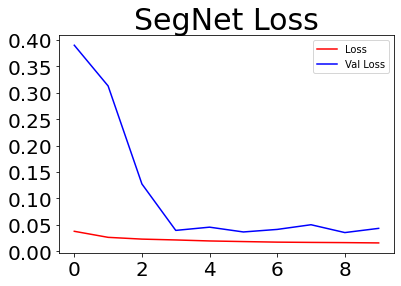

In [16]:
# Print results for training MSE and validation MSE
plt.plot(h_11.history['loss'], 'r', label='Loss')
plt.plot(h_11.history['val_loss'], 'b', label='Val Loss')
plt.title('SegNet Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best')
plt.show()

In [17]:
datagen2 = tf.keras.preprocessing.image.ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
    horizontal_flip=True
)

datagen2.fit(x_train)

In [18]:
h_12 = model.fit(datagen2.flow(x_train, y_train, batch_size=32), \
         steps_per_epoch=len(x_train) // 32, epochs=5, \
              validation_data=datagen2.flow(x_val, y_val, batch_size=32))

Epoch 1/5
81/81 [==============================] - 10s 125ms/step - loss: 0.0240 - accuracy: 0.5320 - val_loss: 0.0351 - val_accuracy: 0.5604
Epoch 2/5
81/81 [==============================] - 10s 124ms/step - loss: 0.0235 - accuracy: 0.5401 - val_loss: 0.0376 - val_accuracy: 0.6009
Epoch 3/5
81/81 [==============================] - 10s 123ms/step - loss: 0.0232 - accuracy: 0.5455 - val_loss: 0.0296 - val_accuracy: 0.5215
Epoch 4/5
81/81 [==============================] - 10s 124ms/step - loss: 0.0231 - accuracy: 0.5457 - val_loss: 0.0264 - val_accuracy: 0.5941
Epoch 5/5
81/81 [==============================] - 10s 123ms/step - loss: 0.0229 - accuracy: 0.5564 - val_loss: 0.0291 - val_accuracy: 0.4978


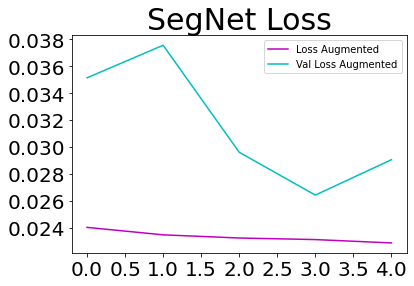

In [19]:
plt.plot(h_12.history['loss'], 'm', label='Loss Augmented')
plt.plot(h_12.history['val_loss'], 'c', label='Val Loss Augmented')
plt.title('SegNet Loss', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best')
plt.show()

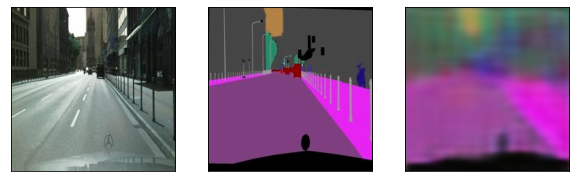

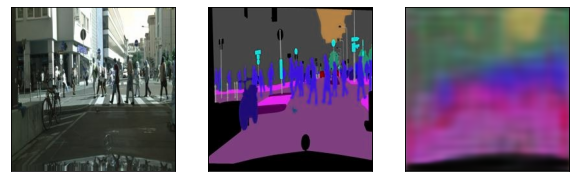

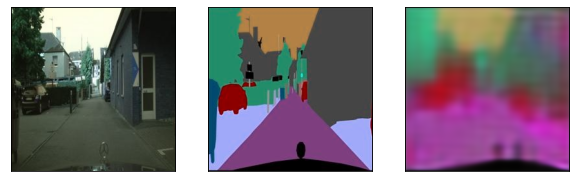

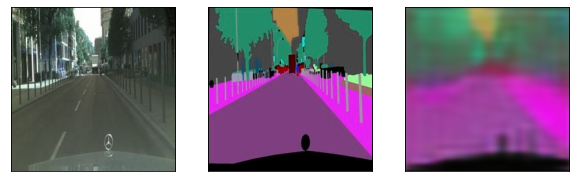

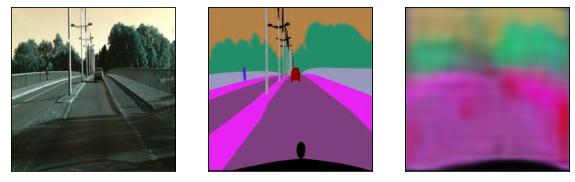

In [20]:
#show the result
pp = model.predict(x_test[:,:,:,:], batch_size=1)

ni = 5
for k in range(ni):
    plt.figure(figsize=(10,30))
    plt.subplot(ni,3,1+k*3)
    plt.imshow(x_test[k])
    figure = plt.gca()
    x_axis = figure.axes.get_xaxis()
    x_axis.set_visible(False)
    y_axis = figure.axes.get_yaxis()
    y_axis.set_visible(False)
    plt.subplot(ni,3,2+k*3)
    plt.imshow(y_test[k])
    figure = plt.gca()
    x_axis = figure.axes.get_xaxis()
    x_axis.set_visible(False)
    y_axis = figure.axes.get_yaxis()
    y_axis.set_visible(False)
    plt.subplot(ni,3,3+k*3)
    plt.imshow(pp[k])
    figure = plt.gca()
    x_axis = figure.axes.get_xaxis()
    x_axis.set_visible(False)
    y_axis = figure.axes.get_yaxis()
    y_axis.set_visible(False)